<a href="https://colab.research.google.com/github/CHANDRASHEKHAR2898/HOME-/blob/main/HOME%20PRICES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
from google.colab import files
uploaded= files.upload()

Saving dataset.csv to dataset.csv


In [3]:
us_house_price_df = pd.read_csv("dataset.csv").set_index("DATE")
us_house_price_df.head()

,CSUSHPISA,Year,Month,Per_Capita_GDP,working_age_pop,Houses,CPI,UNRATE,EmpRate,Cons_Material,FEDFUNDS,urban_pop_us,Num_Households,median_income,Subsidy,old_age_pop
DATE,,,,,,,,,,,,,,,,
01-01-2004,117.144,2004,1,50091.00000,182565279.9,4.2,177.7,5.7,72.016492,142.0,1.73,79.4,109297,65820,24.183,12.3
01-02-2004,117.845,2004,2,50156.00000,182796967.6,4.0,178.0,5.7,72.333310,142.2,1.74,79.4,109297,65820,24.183,12.3
01-03-2004,118.687,2004,3,50221.00000,183077355.6,4.1,178.5,5.7,72.132190,143.2,1.73,79.4,109297,65820,24.183,12.3
01-04-2004,119.611,2004,4,50286.00000,183259721.1,4.3,179.3,5.9,71.915086,143.5,1.75,79.4,109297,65820,24.183,12.3
01-05-2004,120.724,2004,5,50311.33333,183508489.9,4.0,179.5,5.8,72.025945,143.8,1.75,79.4,109297,65820,24.183,12.3


In [4]:
# Correlation matrix
corr_matrix = us_house_price_df.corr()
corr_matrix

,CSUSHPISA,Year,Month,Per_Capita_GDP,working_age_pop,Houses,CPI,UNRATE,EmpRate,Cons_Material,FEDFUNDS,urban_pop_us,Num_Households,median_income,Subsidy,old_age_pop
CSUSHPISA,1.000000,0.756387,-0.001566,0.898301,0.613572,0.093803,0.795320,-0.450736,0.163886,0.880371,0.048950,0.777637,0.737881,0.843589,0.827126,0.828397
Year,0.756387,1.000000,-0.035299,0.939525,0.950140,0.009517,0.985269,-0.149321,-0.317373,0.891317,-0.414494,0.998839,0.996110,0.739342,0.963480,0.967550
Month,-0.001566,-0.035299,1.000000,0.025007,0.030955,-0.003879,0.010695,0.000311,-0.012458,-0.009146,0.002972,-0.036846,-0.034340,-0.027231,-0.048386,-0.044634
Per_Capita_GDP,0.898301,0.939525,0.025007,1.000000,0.853346,0.009322,0.942664,-0.401792,-0.031339,0.912064,-0.166214,0.948374,0.935957,0.844785,0.924439,0.948374
working_age_pop,0.613572,0.950140,0.030955,0.853346,1.000000,0.137455,0.938458,-0.056720,-0.428587,0.800562,-0.399732,0.937232,0.962332,0.571176,0.875745,0.843933
Houses,0.093803,0.009517,-0.003879,0.009322,0.137455,1.000000,0.091654,0.110870,-0.018289,0.151338,0.177908,-0.002108,0.009962,-0.072086,0.059044,-0.091928
CPI,0.795320,0.985269,0.010695,0.942664,0.938458,0.091654,1.000000,-0.149177,-0.299355,0.943087,-0.392851,0.983550,0.980244,0.705626,0.968329,0.954657
UNRATE,-0.450736,-0.149321,0.000311,-0.401792,-0.056720,0.110870,-0.149177,1.000000,-0.846453,-0.199204,-0.500252,-0.171064,-0.177920,-0.472674,-0.088974,-0.235951
EmpRate,0.163886,-0.317373,-0.012458,-0.031339,-0.428587,-0.018289,-0.299355,-0.846453,1.000000,-0.172261,0.704465,-0.289460,-0.305062,0.211232,-0.304322,-0.184014
Cons_Material,0.880371,0.891317,-0.009146,0.912064,0.800562,0.151338,0.943087,-0.199204,-0.172261,1.000000,-0.320490,0.896512,0.875107,0.676664,0.931160,0.903787


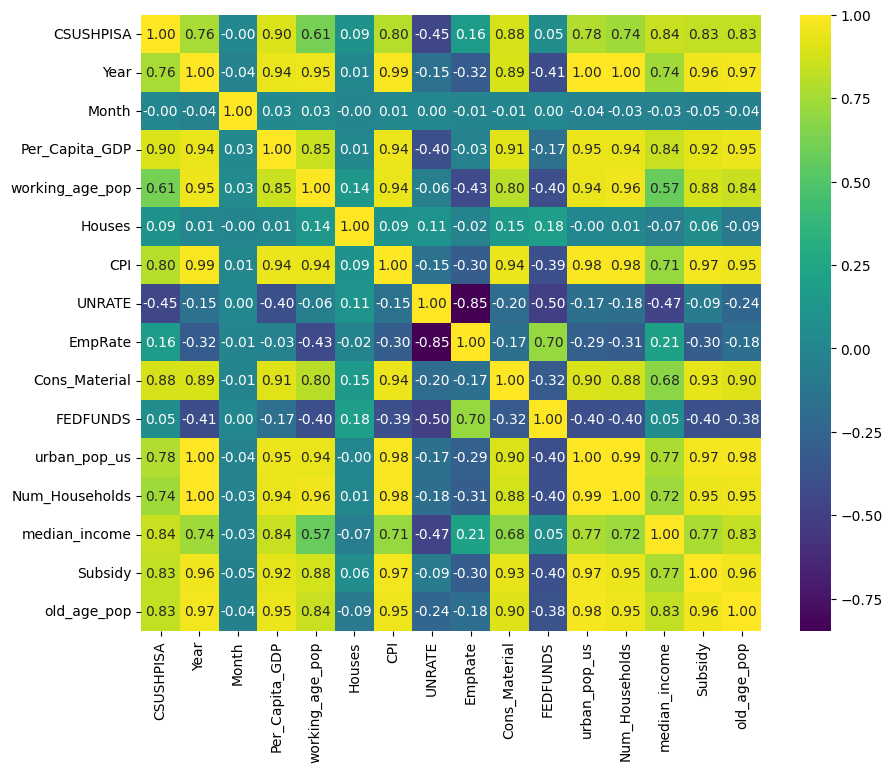

In [5]:
# Visualize correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.show()

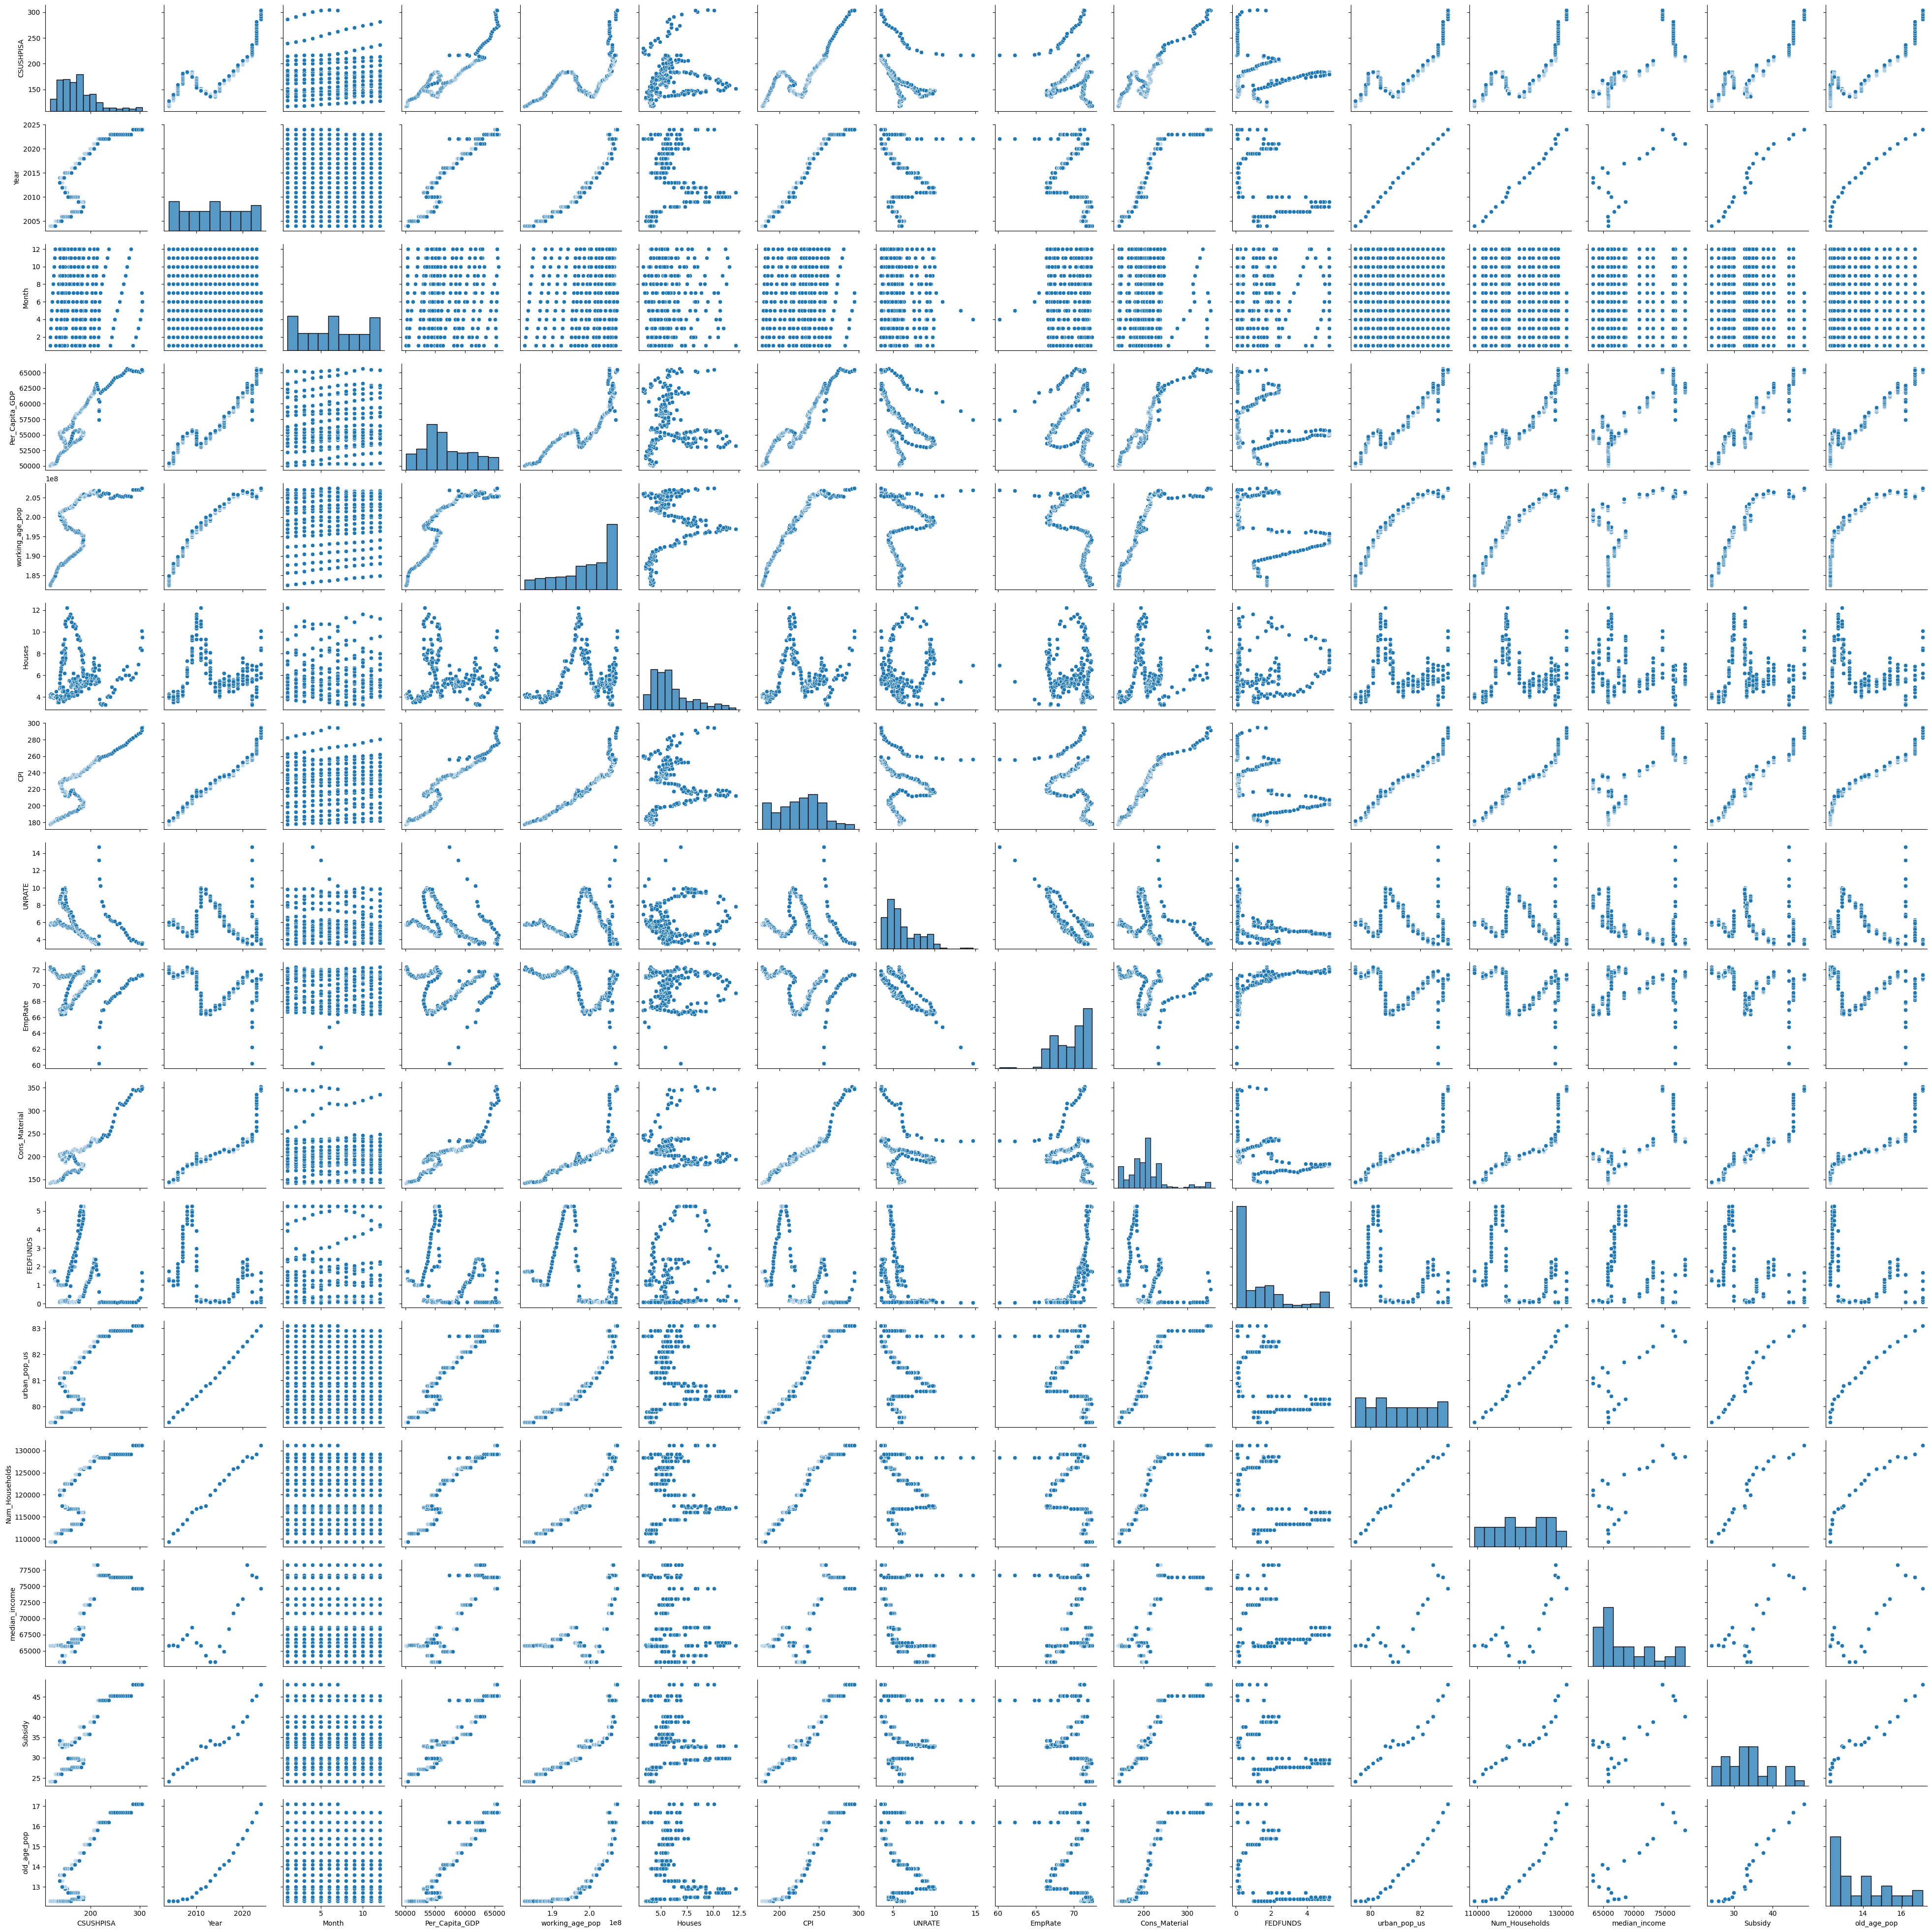

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data (assuming 'dataset.csv' is in the current directory)
us_house_price_df = pd.read_csv("dataset.csv").set_index("DATE")

# Then you can create the pairplot
sns.pairplot(us_house_price_df)
plt.show()

In [6]:
# Separating the target variable and the independent variable
y = us_house_price_df.pop("CSUSHPISA")
X = us_house_price_df

In [9]:
correlations = X.apply(lambda column: np.abs(column.corr(y)))

# Sort correlations in ascending order
sorted_correlations = correlations.sort_values()

# Display features with lower correlation
print("Features with Lower Correlation to Target:")
print(sorted_correlations)

Features with Lower Correlation to Target:
Month              0.001566
FEDFUNDS           0.048950
Houses             0.093803
EmpRate            0.163886
UNRATE             0.450736
working_age_pop    0.613572
Num_Households     0.737881
Year               0.756387
urban_pop_us       0.777637
CPI                0.795320
Subsidy            0.827126
old_age_pop        0.828397
median_income      0.843589
Cons_Material      0.880371
Per_Capita_GDP     0.898301
dtype: float64


effectively analyze the dataset, visualize relationships, and identify key factors influencing US home prices. This process helps in building a robust data science model for predicting home prices.